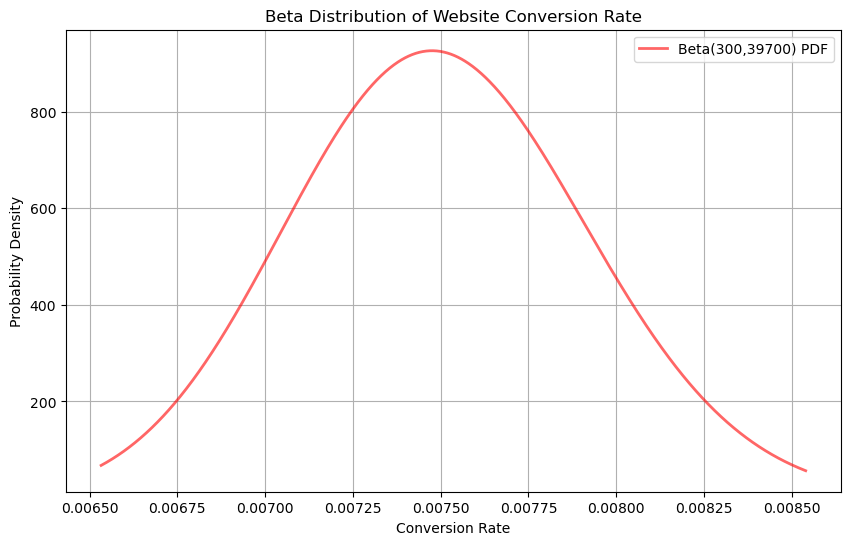

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the beta distribution
a, b = 300, 39700

# Define the range of x values
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)

# Calculate the beta PDF values
y = beta.pdf(x, a, b)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=2, alpha=0.6, label=f'Beta({a},{b}) PDF')
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Beta Distribution of Website Conversion Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()


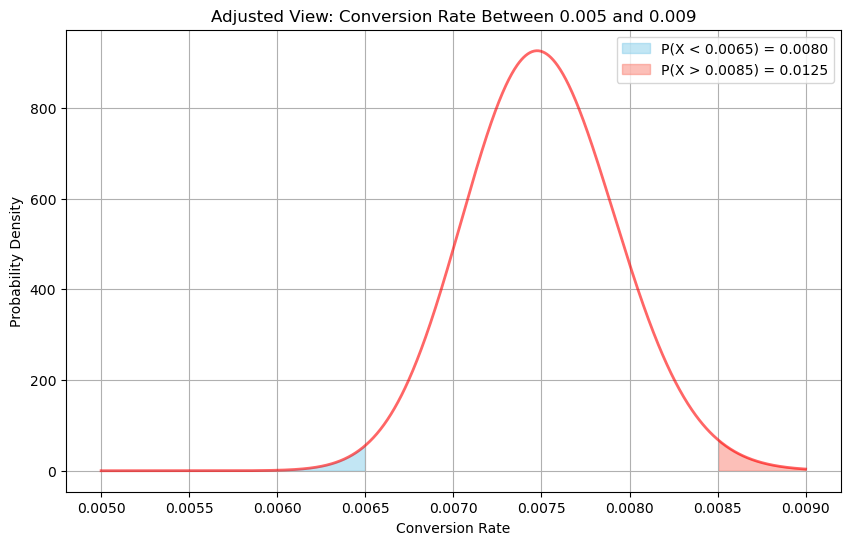

In [7]:
# Adjusting the range of x values to be between 0.005 and 0.009
x_adjusted = np.linspace(0.005, 0.009, 1000)
y_adjusted = beta.pdf(x_adjusted, a, b)

# Recalculating the shaded areas with the adjusted range
plt.figure(figsize=(10, 6))

# Fill the areas under the curve based on the new criteria
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted < 0.0065), color='skyblue', alpha=0.5, label=f'P(X < 0.0065) = {prob_less_than_0065:.4f}')
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted > 0.0085), color='salmon', alpha=0.5, label=f'P(X > 0.0085) = {prob_greater_than_0085:.4f}')

# Plot the beta distribution with the adjusted x-axis range
plt.plot(x_adjusted, y_adjusted, 'r-', lw=2, alpha=0.6)
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Adjusted View: Conversion Rate Between 0.005 and 0.009')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()






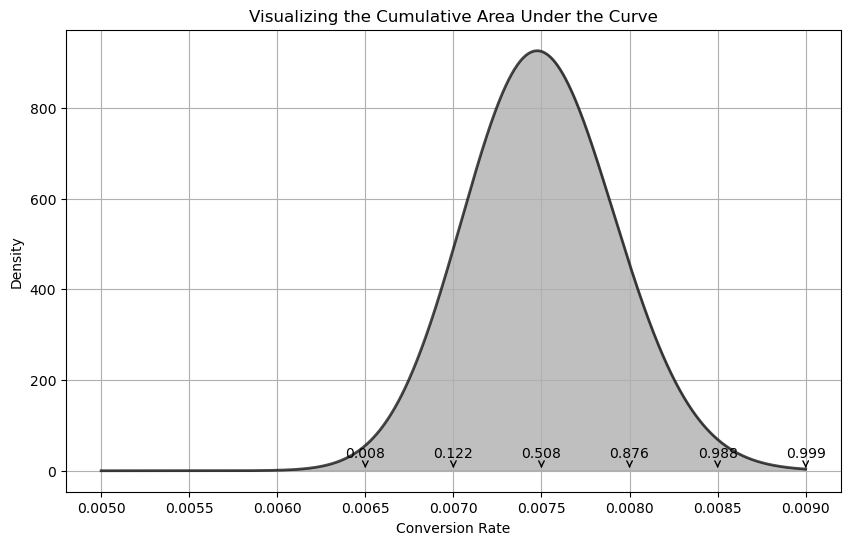

In [8]:
# Recalculating the beta distribution for the new x-axis range
x_cumulative = np.linspace(0.006, 0.009, 7)  # Increment by 0.0005 from 0.006 to 0.009
y_cumulative = beta.pdf(x_cumulative, a, b)

# Calculate the cumulative distribution values for the increments
cumulative_probs = beta.cdf(x_cumulative, a, b)

# Plot the beta distribution and cumulative areas
plt.figure(figsize=(10, 6))
plt.plot(x_adjusted, y_adjusted, 'k-', lw=2, alpha=0.7)

# Fill the area under the curve
plt.fill_between(x_adjusted, y_adjusted, color='grey', alpha=0.5)

# Mark the cumulative probability values on the plot
for i, (x_val, y_val, prob) in enumerate(zip(x_cumulative, y_cumulative, cumulative_probs)):
    if i == 0:  # Skip the first point to only show increments
        continue
    plt.annotate(f'{prob:.3f}', xy=(x_val, 0), xytext=(x_val, 30),
                 textcoords='data', ha='center', color='black',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

# Additional settings for the plot to match the given image style
plt.title('Visualizing the Cumulative Area Under the Curve')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()


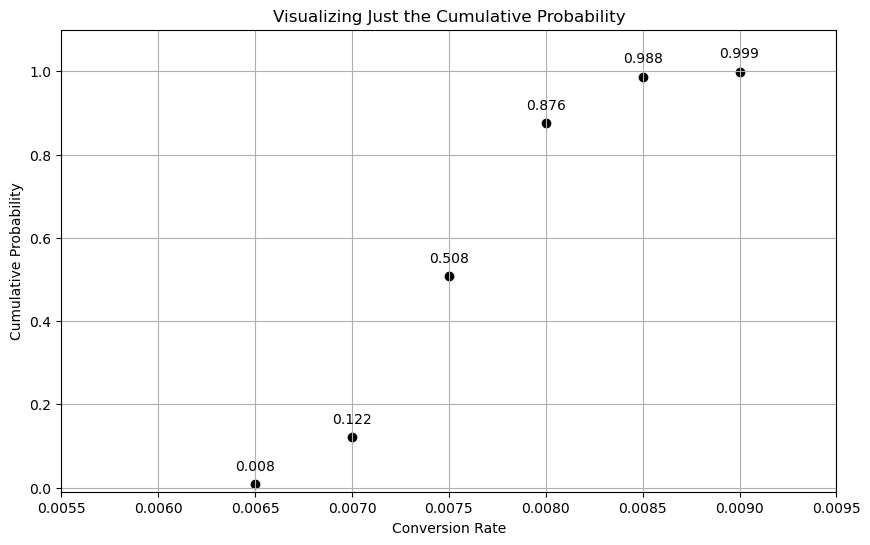

In [18]:
# Plot just the cumulative probabilities with labels and more room at the bottom
plt.figure(figsize=(10, 6))

# Scatter plot of the cumulative probabilities
plt.scatter(x_cumulative[1:], cumulative_probs[1:], color='black')

# Annotating the cumulative probabilities
for i, txt in enumerate(cumulative_probs[1:]):
    plt.annotate(f'{txt:.3f}', (x_cumulative[i + 1], cumulative_probs[i + 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Additional settings for the plot to match the given image style and adjustments
plt.title('Visualizing Just the Cumulative Probability')
plt.xlabel('Conversion Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.ylim(-0.01, 1.1)  # Set y-axis to range from 0 to 1
plt.xlim(0.0055, 0.0095)  # Add more room on the x-axis
plt.show()



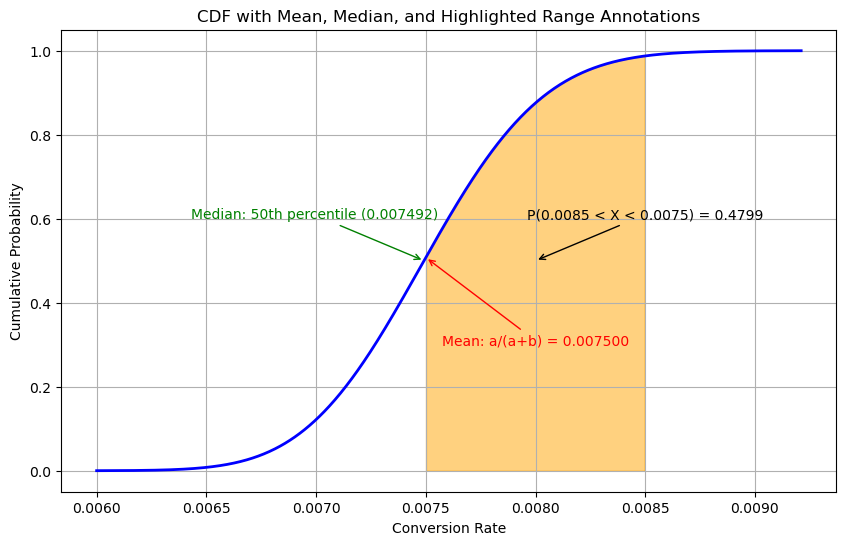

In [26]:
# Define the parameters for the beta distribution
a, b = 300, 39700

# Define the range for the x-axis to include mean and median annotations
x_full_range = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 1000)
y_cdf_full_range = beta.cdf(x_full_range, a, b)

# Calculate the mean and median again
mean = beta.mean(a, b)
median = beta.ppf(0.5, a, b)

# Calculate the probability of the conversion rate being between 0.008 and 0.009
prob_between_0075_and_0085 = beta.cdf(0.0085, a, b) - beta.cdf(0.0075, a, b)

# Plot the CDF with highlighted range between 0.008 and 0.009
plt.figure(figsize=(10, 6))
plt.plot(x_full_range, y_cdf_full_range, 'b-', lw=2)

# Highlight the range between 0.008 and 0.009
plt.fill_between(x_full_range, y_cdf_full_range, where=(x_full_range >= 0.0075) & (x_full_range <= 0.0085), color='orange', alpha=0.5)

# Annotate the median on the plot
plt.annotate(f'Median: 50th percentile ({median:.6f})', xy=(median, 0.5), xytext=(median-0.0005, 0.6),
             textcoords='data', ha='center', color='green',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'))

# Annotate the mean on the plot
plt.annotate(f'Mean: a/(a+b) = {mean:.6f}', xy=(mean, beta.cdf(mean, a, b)), xytext=(mean+0.0005, 0.3),
             textcoords='data', ha='center', color='red',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))

plt.annotate(f'P(0.0085 < X < 0.0075) = {prob_between_0075_and_0085:.4f}', xy=(0.008, 0.5), xytext=(0.0085, 0.6),
             textcoords='data', ha='center', color='black',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

# Additional settings for the plot
plt.title('CDF with Mean, Median, and Highlighted Range Annotations')
plt.xlabel('Conversion Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()









The Median and the Mean in the previous CDF are very close implying that the beta is evenly distributed and not impacted by extreme values.

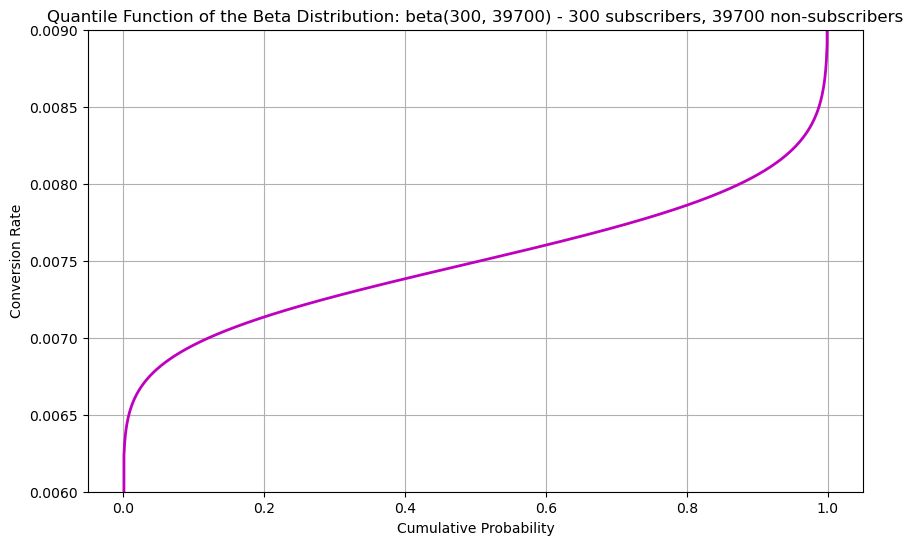

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range for the cumulative probabilities from 0 to 1
cumulative_probs_range = np.linspace(0, 1, 1000)

# Calculate the quantiles for the cumulative probabilities range
quantiles = beta.ppf(cumulative_probs_range, 300, 39700)

# Plot the quantile function (inverse of the CDF)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_probs_range, quantiles, 'm-', lw=2)

# Set the limits for the y-axis
plt.ylim(0.0060, 0.0090)

# Additional settings for the plot
plt.title('Quantile Function of the Beta Distribution: beta(300, 39700) - 300 subscribers, 39700 non-subscribers')
plt.xlabel('Cumulative Probability')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()




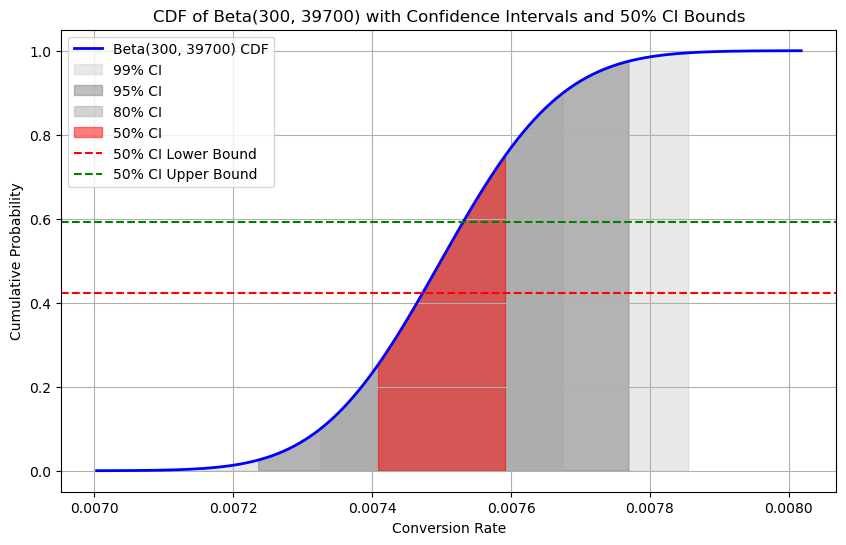

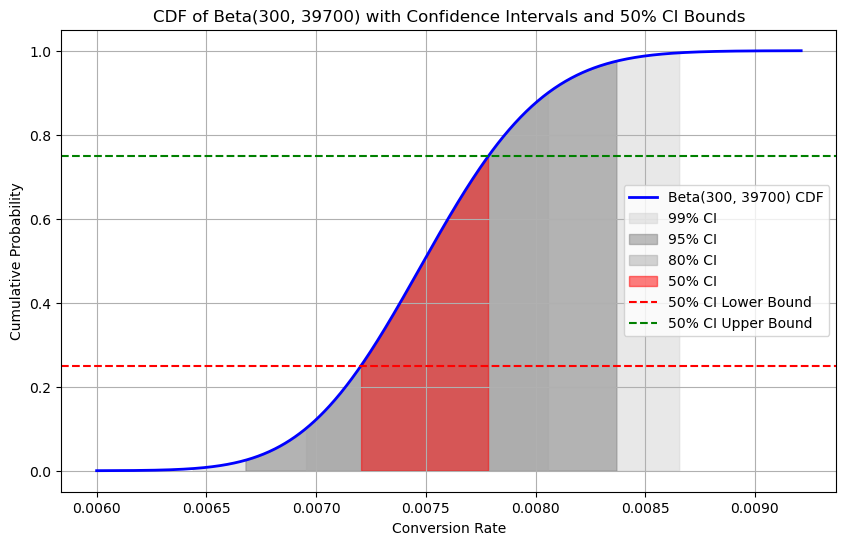

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


def plot_beta_info(a,b):

    # Calculate the confidence interval limits
    ci_99 = beta.ppf([0.005, 0.995], a, b)
    ci_95 = beta.ppf([0.025, 0.975], a, b)
    ci_80 = beta.ppf([0.1, 0.9], a, b)
    ci_50 = beta.ppf([0.25, 0.75], a, b)  # 50% CI

    # Define the x range for plotting
    x_range = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 1000)
    y_cdf = beta.cdf(x_range, a, b)

    # Plotting the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_cdf, 'b-', lw=2, label='Beta(300, 39700) CDF')

    # Highlight the confidence intervals
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_99[0]) & (x_range <= ci_99[1]), color='lightgrey', alpha=0.5, label='99% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_95[0]) & (x_range <= ci_95[1]), color='grey', alpha=0.5, label='95% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_80[0]) & (x_range <= ci_80[1]), color='darkgrey', alpha=0.5, label='80% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_50[0]) & (x_range <= ci_50[1]), color='red', alpha=0.5, label='50% CI')

    # Draw horizontal lines for the 50% CI bounds
    plt.axhline(beta.cdf(ci_50[0], 300, 39700), color='red', linestyle='--', label='50% CI Lower Bound')
    plt.axhline(beta.cdf(ci_50[1], 300, 39700), color='green', linestyle='--', label='50% CI Upper Bound')

    # Additional settings
    plt.title('CDF of Beta(300, 39700) with Confidence Intervals and 50% CI Bounds')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_beta_info(3000, 397000)
plot_beta_info(300, 39700)



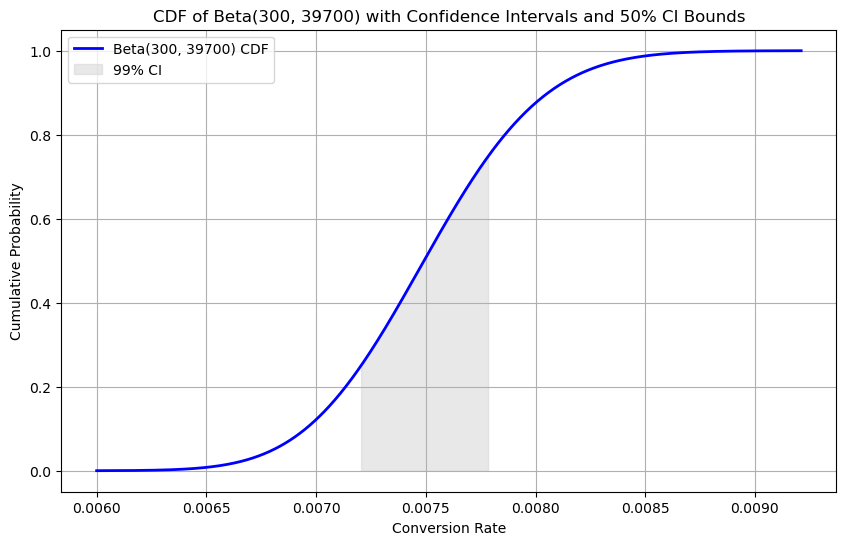

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_info(alpha, beta_val):

    # Calculate the confidence interval limits
    ci_99 = beta.ppf([0.005, 0.995], alpha, beta_val)
    ci_95 = beta.ppf([0.025, 0.975], alpha, beta_val)
    ci_80 = beta.ppf([0.1, 0.9], alpha, beta_val)
    ci_50 = beta.ppf([0.25, 0.75], alpha, beta_val)  # 50% CI

    # Define the x range for plotting
    x_range = np.linspace(beta.ppf(0.0001, alpha, beta_val), beta.ppf(0.9999, alpha, beta_val), 1000)
    y_cdf = beta.cdf(x_range, alpha, beta_val)

    # Plotting the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_cdf, 'b-', lw=2, label='Beta(300, 39700) CDF')

    # Highlight the confidence intervals
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_50[0]) & (x_range <= ci_50[1]), color='lightgrey', alpha=0.5, label='99% CI')
    # plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_95[0]) & (x_range <= ci_95[1]), color='grey', alpha=0.5, label='95% CI')
    # plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_80[0]) & (x_range <= ci_80[1]), color='darkgrey', alpha=0.5, label='80% CI')

    # # Draw horizontal lines for the 50% CI bounds
    # plt.axhline(beta.cdf(ci_50[0], 300, 39700), color='red', linestyle='--', label='50% CI Lower Bound')
    # plt.axhline(beta.cdf(ci_50[1], 300, 39700), color='green', linestyle='--', label='50% CI Upper Bound')

    # Additional settings
    plt.title('CDF of Beta(300, 39700) with Confidence Intervals and 50% CI Bounds')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_beta_info(300, 39700)